# introduction 

#### Handwritten digit recognition is the process to provide the ability to machines to recognize human handwritten digits.
the purpose of this project is to create a good model to recognize Handwritten digit.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras import regularizers
from sklearn.metrics import mean_squared_error

# Data

### this project data are images of numbers from 0-9 , all images have the same size (28,28)

In [2]:
data = pd.read_csv("D:\\digit_dataset\\train\\train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

### sample of the data

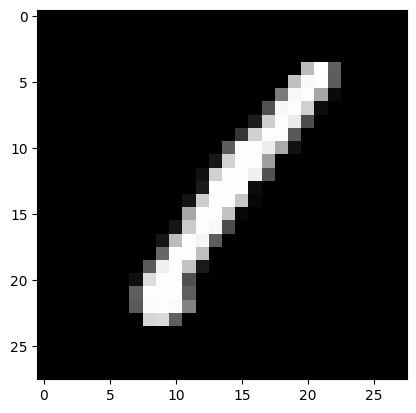

In [4]:
img =np.array(data.iloc[0,1:])
img_array=img .reshape(28,28)
plt.imshow(img_array, cmap='gray') 
plt.show() 


## split the data into three sets 

In [5]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_train,X_remain,y_train,y_remain = train_test_split(X,Y,test_size=0.3,random_state=True)
X_cv,X_test,y_cv,y_test = train_test_split(X_remain,y_remain,test_size=0.5,random_state=True)

In [6]:
print("the spape of X_train = " ,X_train.shape)
print("the spape of X_cross_validation = ", X_cv.shape)
print("the spape of X_test = ", X_test.shape)

the spape of X_train =  (29400, 784)
the spape of X_cross_validation =  (6300, 784)
the spape of X_test =  (6300, 784)


In [7]:
pixels = X_train.values.reshape(-1, 28, 28, 1)
labels = y_train.values

# Models

### build different models an choose the best one 

## first one with two hidden layers and softmax activation function in the output layer

In [8]:
model=Sequential(
    [
        Flatten(input_shape=(28, 28, 1)),
        Dense(units=30,activation="relu"),
        Dense(units=15,activation="relu"),
        Dense(units=10,activation="softmax")
        ])

In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.fit(
    pixels,labels,
    epochs=30,
    )

Epoch 1/30
919/919 [==============================] - 1s 950us/step - loss: 2.4086 - accuracy: 0.2511
Epoch 2/30
919/919 [==============================] - 1s 1ms/step - loss: 1.7321 - accuracy: 0.3442
Epoch 3/30
919/919 [==============================] - 1s 1ms/step - loss: 1.4334 - accuracy: 0.4704
Epoch 4/30
919/919 [==============================] - 1s 1ms/step - loss: 1.1424 - accuracy: 0.5889
Epoch 5/30
919/919 [==============================] - 1s 876us/step - loss: 0.9139 - accuracy: 0.6766
Epoch 6/30
919/919 [==============================] - 1s 1ms/step - loss: 0.7541 - accuracy: 0.7387
Epoch 7/30
919/919 [==============================] - 1s 977us/step - loss: 0.6397 - accuracy: 0.8006
Epoch 8/30
919/919 [==============================] - 1s 968us/step - loss: 0.5171 - accuracy: 0.8489
Epoch 9/30
919/919 [==============================] - 1s 919us/step - loss: 0.4455 - accuracy: 0.8817
Epoch 10/30
919/919 [==============================] - 1s 1ms/step - loss: 0.3717 - accura

## second one with 3 hidden layers and linear activation function in the output layer 

In [10]:
model_2=Sequential(
    [
        Flatten(input_shape=(28, 28, 1)),
        Dense(units=64,activation="relu"),
        Dense(units=32,activation="relu"),
        Dense(units=16,activation="relu"),
        Dense(units=10,activation="linear")
        ])

In [11]:
#from_logits=True >> make the model more accurate
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

history = model_2.fit(
    pixels,labels,
    epochs=40
)

Epoch 1/40
919/919 [==============================] - 1s 777us/step - loss: 1.6947 - accuracy: 0.6469
Epoch 2/40
919/919 [==============================] - 1s 822us/step - loss: 0.5484 - accuracy: 0.8344
Epoch 3/40
919/919 [==============================] - 1s 865us/step - loss: 0.3746 - accuracy: 0.8905
Epoch 4/40
919/919 [==============================] - 1s 806us/step - loss: 0.3041 - accuracy: 0.9139
Epoch 5/40
919/919 [==============================] - 1s 815us/step - loss: 0.2509 - accuracy: 0.9297
Epoch 6/40
919/919 [==============================] - 1s 798us/step - loss: 0.2215 - accuracy: 0.9406
Epoch 7/40
919/919 [==============================] - 1s 887us/step - loss: 0.1949 - accuracy: 0.9473
Epoch 8/40
919/919 [==============================] - 1s 1ms/step - loss: 0.1692 - accuracy: 0.9523
Epoch 9/40
919/919 [==============================] - 1s 983us/step - loss: 0.1649 - accuracy: 0.9562
Epoch 10/40
919/919 [==============================] - 1s 862us/step - loss: 0.1509 


## third one with 4 hidden layers and linear activation function in the output layer , this model will have regularizer parameter to avoid overfitting

In [12]:
model_3=Sequential(
    [
        Flatten(input_shape=(28, 28, 1)),
        Dense(units=512,activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
        Dense(units=128,activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
        Dense(units=64,activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
        Dense(units=32,activation="relu",kernel_regularizer=regularizers.l2(0.001)),
        Dense(units=10,activation="linear",kernel_regularizer=regularizers.l2(0.001))
        ])

In [13]:
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model_3.fit(
    pixels,labels,
    
    epochs=60
)


Epoch 1/60
919/919 [==============================] - 6s 6ms/step - loss: 1.1836 - accuracy: 0.7841
Epoch 2/60
919/919 [==============================] - 7s 7ms/step - loss: 0.4038 - accuracy: 0.9236
Epoch 3/60
919/919 [==============================] - 8s 8ms/step - loss: 0.2995 - accuracy: 0.9481
Epoch 4/60
919/919 [==============================] - 7s 7ms/step - loss: 0.2464 - accuracy: 0.9611
Epoch 5/60
919/919 [==============================] - 7s 8ms/step - loss: 0.2243 - accuracy: 0.9649
Epoch 6/60
919/919 [==============================] - 6s 7ms/step - loss: 0.1933 - accuracy: 0.9717
Epoch 7/60
919/919 [==============================] - 6s 7ms/step - loss: 0.1813 - accuracy: 0.9736
Epoch 8/60
919/919 [==============================] - 7s 7ms/step - loss: 0.1714 - accuracy: 0.9756
Epoch 9/60
919/919 [==============================] - 6s 7ms/step - loss: 0.1480 - accuracy: 0.9799
Epoch 10/60
919/919 [==============================] - 7s 7ms/step - loss: 0.1486 - accuracy: 0.9799

# evaluate the models

## first one

In [14]:
y_hat_train_1 =  model.predict(X_train.values.reshape(-1, 28, 28, 1))
y_hat_cv_1    = model.predict(X_cv.values.reshape(-1, 28, 28, 1))
y_hat_cv = []
y_hat_train = []
for i in range (y_hat_train_1.shape[0]):
    y_hat_train.append( y_hat_train_1[i].argmax())
for i in range (y_hat_cv_1.shape[0]):
    y_hat_cv.append( y_hat_cv_1[i].argmax())
    
print("MSE OF train =",mean_squared_error(np.array(y_train),y_hat_train)/2)
print("MSE OF CV =",mean_squared_error(np.array(y_cv),y_hat_cv)/2)
print("-------------------------------")
print("accuracy score OF train =",accuracy_score(np.array(y_train),y_hat_train))
print("accuracy score OF CV =",accuracy_score(np.array(y_cv),y_hat_cv))

MSE OF train = 0.298265306122449
MSE OF CV = 0.5452380952380952
-------------------------------
accuracy score OF train = 0.9729931972789115
accuracy score OF CV = 0.9428571428571428


## second one 

#### note we will add softmax layer as activation function in the output of the model

In [15]:
y_hat_train_1 =np.array( tf.nn. softmax(model_2(X_train.values.reshape(-1, 28, 28, 1))))
y_hat_cv_1    = np.array(tf.nn. softmax(model_2(X_cv.values.reshape(-1, 28, 28, 1))))
y_hat_cv = []
y_hat_train = []
for i in range (y_hat_train_1.shape[0]):
    y_hat_train.append( y_hat_train_1[i].argmax())
for i in range (y_hat_cv_1.shape[0]):
    y_hat_cv.append( y_hat_cv_1[i].argmax())
    
print("MSE OF train =",mean_squared_error(np.array(y_train),y_hat_train)/2)
print("MSE OF CV =",mean_squared_error(np.array(y_cv),y_hat_cv)/2)
print("-------------------------------")
print("accuracy score OF train =",accuracy_score(np.array(y_train),y_hat_train))
print("accuracy score OF CV =",accuracy_score(np.array(y_cv),y_hat_cv))

MSE OF train = 0.06852040816326531
MSE OF CV = 0.31476190476190474
-------------------------------
accuracy score OF train = 0.9927891156462585
accuracy score OF CV = 0.9636507936507936


## third one 

In [16]:
y_hat_train_1 =np.array( tf.nn. softmax(model_3(X_train.values.reshape(-1, 28, 28, 1))))
y_hat_cv_1    = np.array(tf.nn. softmax(model_3(X_cv.values.reshape(-1, 28, 28, 1))))
y_hat_train = []
y_hat_cv = []
for i in range (y_hat_train_1.shape[0]):
    y_hat_train.append( y_hat_train_1[i].argmax())
for i in range (y_hat_cv_1.shape[0]):
    y_hat_cv.append( y_hat_cv_1[i].argmax())
    
print("MSE OF train =",mean_squared_error(np.array(y_train),y_hat_train)/2)
print("MSE OF CV =",mean_squared_error(np.array(y_cv),y_hat_cv)/2)
print("-------------------------------")
print("accuracy score OF train =",accuracy_score(np.array(y_train),y_hat_train))
print("accuracy score OF CV =",accuracy_score(np.array(y_cv),y_hat_cv))

MSE OF train = 0.07372448979591836
MSE OF CV = 0.2646031746031746
-------------------------------
accuracy score OF train = 0.993843537414966
accuracy score OF CV = 0.9693650793650793


# choose the model

## based on this result in model evaluation stage ,  I choose (model_3)

In [17]:
y_hat_test_1    = np.array(tf.nn. softmax(model_3(X_test.values.reshape(-1, 28, 28, 1))))
y_hat_test = []
for i in range (y_hat_test_1.shape[0]):
    y_hat_test.append(y_hat_test_1[i].argmax())
    
print("MSE OF test =",mean_squared_error(np.array(y_test),y_hat_test)/2)
print("-------------------------------")
print("accuracy score OF test =",accuracy_score(np.array(y_test),y_hat_test)*100)

MSE OF test = 0.251984126984127
-------------------------------
accuracy score OF test = 97.15873015873015


# Making Predictions

Text(0.5, 0.98, 'Label, yhat')

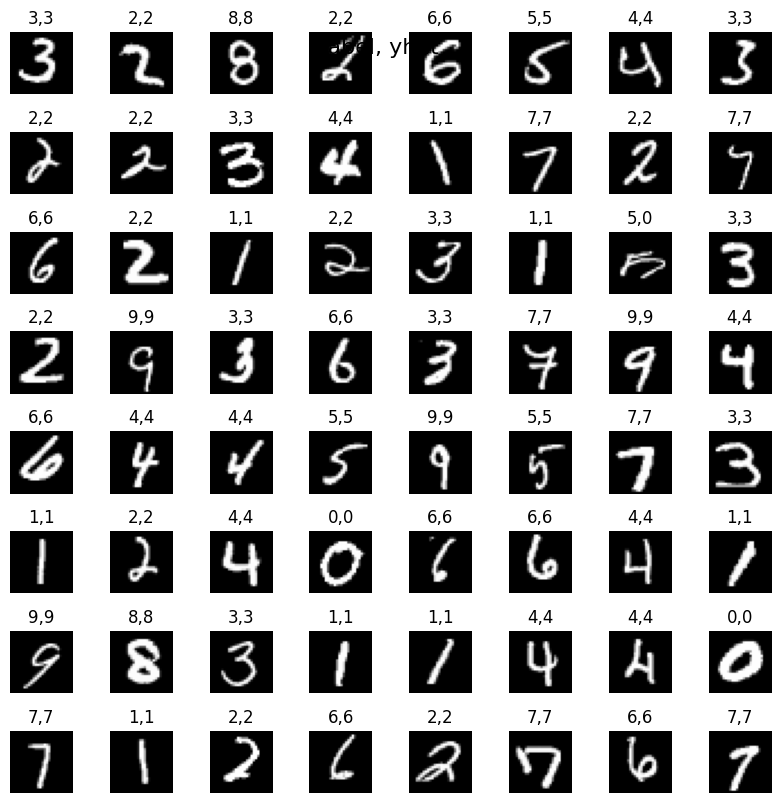

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test.shape


fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test.values[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Predict using the Neural Network
    prediction = np.array(tf.nn. softmax(model_3(X_test.values[random_index].reshape(-1, 28, 28, 1))))
    yhat = prediction.argmax()
    # Display the label above the image
    ax.set_title(f"{y_test.values[random_index]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)